<a href="https://colab.research.google.com/github/bhadreshpsavani/ExploringDataScience/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Exploratory Data Analysis(EDA):
An approach to analyse and find characteristics and interesting patterns in the data
1. Make Data in Representable
2. Find Pattern
3. Spot Anomaly
4. Test Hypothesis
5. Check Assumptions

Data Scientist roughly spend around 40-50% of their time in EDA

## Step1. Import Modules

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Step2. Loading Data

In [2]:
!git clone https://github.com/bhadreshpsavani/ExploringDataScience.git

Cloning into 'ExploringDataScience'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 32 (delta 8), reused 7 (delta 1), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [5]:
df = pd.read_csv('/content/ExploringDataScience/Dataset/StudentsPerformance.csv')

## Step3. Exploring Features

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We have eight columns with no missing values

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [10]:
df.columns = ['gender', 
              'race_or_ethnicity', 
              'parental_level_of_education', 
              'lunch', 
              'test_preparation_course',
              'math_score',
              'reading_score',
              'writing_score']

In [11]:
df.race_or_ethnicity.value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_or_ethnicity, dtype: int64

In [12]:
df.parental_level_of_education.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [13]:
df.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [14]:
df.test_preparation_course.value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

## Conclusion:
* Our data don't have any missing values

In [16]:
df['final_score'] = df['math_score']+	df['reading_score'] +	df['writing_score']

In [39]:
def result(row):
  if row['math_score']>50 and row['reading_score']>50 and row['writing_score']>50:
    return 1
  else:
    return 0

In [40]:
df['result'] = df.apply(result, axis=1)
df.head()

,gender,race_or_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,final_score,result
0,female,group B,bachelor's degree,standard,none,72,72,74,218,1
1,female,group C,some college,standard,completed,69,90,88,247,1
2,female,group B,master's degree,standard,none,90,95,93,278,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0
4,male,group C,some college,standard,none,76,78,75,229,1


## Step6. Data Visulization

Some Common Plots Used for EDA:
* Histograms
* Scatter Plots
* Pair Plots
* Box Plots
* Pivot table

### 1. Histogram:


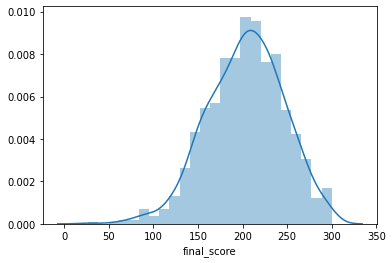

In [42]:
sns.distplot(df['final_score'])

In [43]:
df.pivot_table(index='parental_level_of_education', values='result')

,result
parental_level_of_education,
associate's degree,0.842342
bachelor's degree,0.855932
high school,0.719388
master's degree,0.847458
some college,0.827434
some high school,0.726257


In [46]:
df.pivot_table(index='parental_level_of_education', columns='race_or_ethnicity', values='result')*100

race_or_ethnicity,group A,group B,group C,group D,group E
parental_level_of_education,,,,,
associate's degree,64.285714,82.926829,88.461538,80.000000,89.743590
bachelor's degree,75.000000,95.000000,82.500000,82.142857,94.444444
high school,61.111111,62.500000,75.000000,72.727273,90.909091
master's degree,33.333333,83.333333,84.210526,91.304348,87.500000
some college,77.777778,72.972973,79.710145,89.552239,88.571429
some high school,45.833333,76.315789,71.428571,80.000000,83.333333


## Step6. Hypothesis Testing

## Resources:
* [summarising-aggregation-and-grouping-data-in-python-pandas](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)